В цьому домашньому завданні ми з вами побудуємо повноцінне ML-рішення реальної ML-задачі. Ви вже маєте всі знання, які для цього потрібні. Дотримуйтесь інструкцій, та користуйтесь матеріалами лекцій, аби виконувати завдання. Тут інструкції будуть детальні, а в подільших завданнях - будуть ставати все менш детальними, аби ви вже починали самостійно структурувати ML-проєкт і до кінця курсу для вас розвʼязати будь-яку ML–задачу було eazy-breezy.

## Dataset

Будемо працювати з набором даних `cars.csv`, який описує автомобілі і їх ціну у індійських рупіях :) Мета - передбачити ціну авто за його характеристиками. Опис набору даних:

| Назва рядка            | Опис                                                                                                                                                 |
|------------------------|--------------------------------------------------------------------------------------------------------------------------------------------------------|
| Car_ID                 | Унікальний ідентифікатор для кожного оголошення про автомобіль.                                                                                         |
| Brand                  | Бренд або виробник автомобіля (наприклад, Toyota, Honda, Ford тощо).                                                                                     |
| Model                  | Модель автомобіля (наприклад, Camry, Civic, Mustang тощо).                                                                                               |
| Year                   | Рік виготовлення автомобіля.                                                                                                                            |
| Kilometers_Driven      | Загальний пробіг автомобіля у кілометрах.                                                                                                               |
| Fuel_Type              | Тип палива, який використовує автомобіль (наприклад, бензин, дизель, електро тощо).                                                                      |
| Transmission           | Тип трансмісії автомобіля (наприклад, механічна, автоматична).                                                                                           |
| Owner_Type             | Кількість попередніх власників автомобіля (наприклад, перший, другий, третій).                                                                           |
| Mileage                | Паливна ефективність автомобіля у кілометрах на літр.                                                                                                   |
| Engine                 | Об'єм двигуна автомобіля в кубічних сантиметрах (CC).                                                                                                   |
| Power                  | Максимальна потужність автомобіля в кінських силах (bhp).                                                                                               |
| Seats                  | Кількість місць в автомобілі.                                                                                                                           |
| Price                  | Вартість автомобіля в INR (індійські рупії), що є цільовою змінною для прогнозування.                                                                   |

# Імпорти

Для зручності рекомендую всі імпорти розмістити тут нагорі, аби коли ви перезавантажували ноутбук, одразу можна було в один запуск клітинки імпортувати всі потрібні бібліотеки.

In [398]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

from modules.modules_2.topic_2_1.utils import analyze_dataframe

# Знайомство з даними

**Завдання 1.** Завантажте набір даних `cars.csv` в pandas.DataFrame. Виведіть перші 5 записів.

In [399]:
df = pd.read_csv('cars.csv')

# **Завдання 2.**

Виведіть типи даних колонок даних, а також дослідіть, які по факту типи даних мають записи в кожній колонці (тип `object` може містити різні типи даних) і скільки значень є в кожній категоріальній колонці.

Напишіть висновок, скільки в наборі даних числових та категоріальних колонок кожного з трьох різних типів (бінарна, мільтикатегоріальна без порядку, мультикатегоріальна з порядком). Шаблон висновку

```
В наборі даних 10 числових і 10 категоріальних колонок з них
- 2 бінарні (мають лише 2 значення)
- 6 мультикатегоріальних (більше 2х значень) зі значеннями, для яких немає відношення порядку
- 2 колонки, в яких можна встановити відношення порядку (наприклад Small<Medium<Large)
```

Якщо не знаєте, як це зробити з `pandas` - ось підказка, які методи можуть допомогти вам виконати це завдання

- pandas.DataFrame.info()
- pandas.DataFrame.dtypes
- pandas.DataFrame.loc[...]
- pandas.DataFrame.select_dtypes(...)
- pandas.Series.unique()
- pandas.Series.nunique()

Детальніше ознайомитись з кожним ви можете в [документації](https://pandas.pydata.org/docs/reference/frame.html), або написати в окремій клітинці знак питання і назву методу (тільки приберіть це перед здачею, бо перегляд документації - не допомагає зрозуміти дані і хід думок, а Ваша робота - це як презентація замовнику зробленої задачі).


In [400]:
# приклад як викликати документацію, якщо у Вас pandas імпортований як pd
?pd.DataFrame.info

## EDA - Exploratory Data Analysis

### Огляд декількох записів з датафрейму

In [401]:
df.head(n=10)

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,1,Toyota,Corolla,2018,50000,Petrol,Manual,First,15,1498,108,5,800000
1,2,Honda,Civic,2019,40000,Petrol,Automatic,Second,17,1597,140,5,1000000
2,3,Ford,Mustang,2017,20000,Petrol,Automatic,First,10,4951,395,4,2500000
3,4,Maruti,Swift,2020,30000,Diesel,Manual,Third,23,1248,74,5,600000
4,5,Hyundai,Sonata,2016,60000,Diesel,Automatic,Second,18,1999,194,5,850000
5,6,Tata,Nexon,2019,35000,Petrol,Manual,First,17,1198,108,5,750000
6,7,Mahindra,Scorpio,2018,45000,Diesel,Automatic,Second,15,2179,140,7,900000
7,8,Volkswagen,Polo,2020,25000,Petrol,Automatic,First,18,999,76,5,650000
8,9,Audi,A4,2017,30000,Diesel,Automatic,First,18,1968,187,5,2200000
9,10,BMW,X1,2019,20000,Diesel,Automatic,Second,20,1995,190,5,2700000


### Перевірка структури даних

In [402]:
# Перегляд основної інформації про датасет
df.info(verbose=True, show_counts=True)
print('Перевірка розмірності даних:', df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Car_ID             100 non-null    int64 
 1   Brand              100 non-null    object
 2   Model              100 non-null    object
 3   Year               100 non-null    int64 
 4   Kilometers_Driven  100 non-null    int64 
 5   Fuel_Type          100 non-null    object
 6   Transmission       100 non-null    object
 7   Owner_Type         100 non-null    object
 8   Mileage            100 non-null    int64 
 9   Engine             100 non-null    int64 
 10  Power              100 non-null    int64 
 11  Seats              100 non-null    int64 
 12  Price              100 non-null    int64 
dtypes: int64(8), object(5)
memory usage: 10.3+ KB
Перевірка розмірності даних: (100, 13)


Маємо 100 рядків та 13 колонок в наборі даних

In [403]:
analyze_dataframe(df)

Кількість числових колонок: 8
Кількість категоріальних колонок: 5
 - Бінарних: 2
 - Мультикатегоріальних: 3
Числові колонки: ['Car_ID', 'Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats', 'Price']
Категоріальні колонки: ['Brand', 'Model', 'Fuel_Type', 'Transmission', 'Owner_Type']
Бінарні колонки: ['Fuel_Type', 'Transmission']
Мультикатегоріальні колонки: ['Brand', 'Model', 'Owner_Type']


### Статистичний звіт для числових змінних

In [404]:
df.describe(percentiles=[0.25, 0.5, 0.75, 0.99, 0.999])

,Car_ID,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price
count,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000,1.000000e+02
mean,50.500000,2018.39000,28150.000000,17.210000,1855.230000,158.130000,5.230000,1.574000e+06
std,29.011492,1.17116,9121.375716,3.309902,631.311475,76.968137,0.750151,1.000265e+06
min,1.000000,2016.00000,10000.000000,10.000000,999.000000,68.000000,4.000000,4.500000e+05
25%,25.750000,2017.75000,22000.000000,15.000000,1462.000000,103.000000,5.000000,7.000000e+05
50%,50.500000,2018.00000,27000.000000,17.000000,1774.000000,148.000000,5.000000,1.300000e+06
75%,75.250000,2019.00000,32000.000000,19.000000,2143.000000,187.000000,5.000000,2.500000e+06
99%,99.010000,2021.00000,50100.000000,25.000000,3017.530000,396.000000,7.000000,4.000000e+06
99.9%,99.901000,2021.00000,59010.000000,25.000000,4757.653000,396.000000,7.000000,4.000000e+06
max,100.000000,2021.00000,60000.000000,25.000000,4951.000000,396.000000,7.000000,4.000000e+06


In [405]:
# Перевірка на пропуски
print(df.select_dtypes(include='number').isnull().sum())

Car_ID               0
Year                 0
Kilometers_Driven    0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
dtype: int64


### Аналіз категоріальних змінних

In [406]:
df.select_dtypes(include='object').columns

Index(['Brand', 'Model', 'Fuel_Type', 'Transmission', 'Owner_Type'], dtype='object')

In [407]:
# Перевірка кількості категоріальних змінних
len_object_columns = len(df.select_dtypes(include='object').columns)
print(len_object_columns)

5


Дані містять 5 `categorical` змінних.
Попередньо бачу, що можна перевести Transmission в бінарну зміну.

In [408]:
columns = df.select_dtypes(include='object').columns

for column in columns:
    print(f'Column: {column}')
    print(df[column].value_counts())
    print(df[column].unique())
    print(f'Unique number: {df[column].nunique()}', end='\n\n')

Column: Brand
Brand
Ford          11
Hyundai       11
Tata          11
Toyota        10
Volkswagen    10
Audi          10
BMW           10
Mercedes      10
Honda          6
Maruti         6
Mahindra       5
Name: count, dtype: int64
['Toyota' 'Honda' 'Ford' 'Maruti' 'Hyundai' 'Tata' 'Mahindra' 'Volkswagen'
 'Audi' 'BMW' 'Mercedes']
Unique number: 11

Column: Model
Model
Mustang          3
Altroz           3
C-Class          3
Verna            3
Fortuner         2
S-Cross          2
Vitara           2
WR-V             2
Ameo             2
A3               2
7 Series         2
GLE              2
Yaris            2
Ranger           2
Santro           2
Tigor            2
T-Roc            2
BR-V             2
Elantra          2
Q7               2
X5               2
GLA              2
Camry            2
Venue            2
Tiago            2
XUV300           2
Vento            2
A5               2
3 Series         2
Innova Crysta    2
Safari           2
EcoSport         2
Aspire           2


In [409]:
df['Transmission'].unique(), df['Transmission'].nunique()

(array(['Manual', 'Automatic'], dtype=object), 2)

In [410]:
df['Owner_Type'].unique(), df['Owner_Type'].nunique()

(array(['First', 'Second', 'Third'], dtype=object), 3)

### Аналіз числових змінних

In [411]:
number_df = df.select_dtypes(include='number')

In [412]:
number_df.columns

Index(['Car_ID', 'Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power',
       'Seats', 'Price'],
      dtype='object')

In [413]:
# Перевірка кількості числових змінних
len_int64_columns = len(number_df.columns)
print(len_int64_columns)

8


Дані містять 8 `numerical` змінних

In [414]:
number_df.head(n=10)

,Car_ID,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price
0,1,2018,50000,15,1498,108,5,800000
1,2,2019,40000,17,1597,140,5,1000000
2,3,2017,20000,10,4951,395,4,2500000
3,4,2020,30000,23,1248,74,5,600000
4,5,2016,60000,18,1999,194,5,850000
5,6,2019,35000,17,1198,108,5,750000
6,7,2018,45000,15,2179,140,7,900000
7,8,2020,25000,18,999,76,5,650000
8,9,2017,30000,18,1968,187,5,2200000
9,10,2019,20000,20,1995,190,5,2700000


### Робота з некоректними типами даних

Перевірка, чи немає у нас стовпця з неправильним типом даних

In [415]:
df.dtypes

Car_ID                int64
Brand                object
Model                object
Year                  int64
Kilometers_Driven     int64
Fuel_Type            object
Transmission         object
Owner_Type           object
Mileage               int64
Engine                int64
Power                 int64
Seats                 int64
Price                 int64
dtype: object

Дивлячись на дані та відповідні їм типи даних, можна змінити тип стовпчика `Car_ID`.

*NOTE: Перетворення Car_ID з int64 на str допомагає позбутися випадкових математичних операцій, оптимізує використання цього поля як категоріального або унікального ідентифікатора, а також зберігає пам’ять у деяких сценаріях.*

In [416]:
#df['Car_ID'] = df['Car_ID'].astype("str")

Також можна перетворити типи даних для `Fuel_Type`, `Transmission`, `Owner_Type`.

In [417]:
#df['Is_Petrol_Fuel_Type'] = (df['Fuel_Type'] == 'Petrol').astype(int)

# Перевірка результату
#print(df[['Fuel_Type', 'Is_Petrol_Fuel_Type']].head())

In [418]:
#df['Is_Manual_Transmission'] = (df['Transmission'] == 'Manual').astype(int)

# Перевірка результату
#print(df[['Transmission', 'Is_Manual_Transmission']].head())

In [419]:
df['Owner_Type'].unique()

array(['First', 'Second', 'Third'], dtype=object)

In [420]:
# Порядкове кодування для Owner_Type
#owner_type_order = ['First', 'Second', 'Third']

#df['Owner_Type_Encoded'] = pd.Categorical(df['Owner_Type'], categories=df['Owner_Type'].unique(), ordered=True).codes

# Перевірка результату
#print(df[['Owner_Type', 'Owner_Type_Encoded']].head())

### Висновок EDA
*На момент огляду dataset маємо наступні дані:*

Кількість числових колонок: 8
Кількість категоріальних колонок: 5
 - Бінарних: 2
 - Мультикатегоріальних: 3
 - Колонки в яких можливо встановити відношення: 1, а саме ->['Owner_Type']. (наприклад, First < Second < Third).

Числові колонки: ['Car_ID', 'Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats', 'Price']

Категоріальні колонки: ['Brand', 'Model', 'Fuel_Type', 'Transmission', 'Owner_Type']

Бінарні колонки: ['Fuel_Type', 'Transmission']

Мультикатегоріальні колонки: ['Brand', 'Model', 'Owner_Type']



# **Завдання 3**.

Розділіть дані на тренувальні і тест. Відведіть в тест 20%, поставте `random_state=12`. Ми будемо передбачати колонку `Price` - тож, вона є цільовою змінною. В результаті у Вас має бути 4 набори даних `X_train, X_test, y_train, y_test`.

Надалі ми всюди тренуємо методи для кодування, масштабування та саму модель тільки на тренувальних даних X_train (та y_train для моделі), а на тестувальних лише використовуємо вже навчені методи для кодування, масштабування і модель викликаючи в них `transform()` (для методів обробки даних) або `predict()` (для моделі).

І так само треба робити завжди.

In [421]:
X = df.drop('Price', axis=1)
y = df['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

**Завдання 4**. Кодуємо категоріальні колонки.

1. Закодуйте колонки з бінарними значеннями `Fuel_Type` і `Transmission` так, аби вони були у чисельному представленні і містили лише 0 так 1. Приклад був у лекції. Значення 1 нехай буде у категорії, яка містить більше значень в колонці.

2. Закодуйте колонку `Brand` з використанням `sklearn.preprocessing.OneHotEncoder` аналогічно до того, як ми робили це в лекції. Увага! Ми робимо виклик методу `Encoder.fit()` на тренувальних даних `X_train`, а на тестувальних тільки викликаємо `Encoder.transform()`. Додайте закодовані значення в набори даних `X_train`, `X_test`.

3. Колонку `Owner_Type` з використанням `sklearn.preprocessing.OrdinalEncoder` я закодую для вас. Проаналізуйте, що відбувається.

Колонка `Model` містять забагато значень для кодування в тому вигляді, як вона є зараз, з огляду на невелику кількість даних. Якщо ви бачите, як можна згрупувати значення в цій колонці скоротивши кількість унікальних значень до 3-5, то можете виконати ще цю трансформацію, використати цю колонку в моделі і отримати додаткову практику і бал, якщо все буде зроблено правильно. А якщо неправильно - то фідбек на Вашу роботу :)

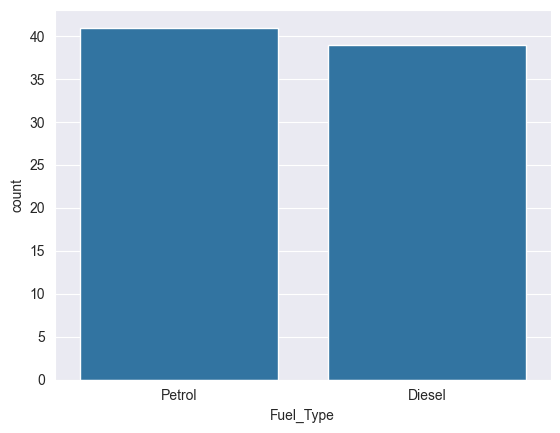

In [422]:
sns.countplot(data=X_train, x='Fuel_Type');

In [423]:
fuel_codes = {'Petrol': 1, 'Diesel': 0}
X_train['Fuel_Code'] = X_train['Fuel_Type'].map(fuel_codes)
X_test['Fuel_Code'] = X_test['Fuel_Type'].map(fuel_codes)

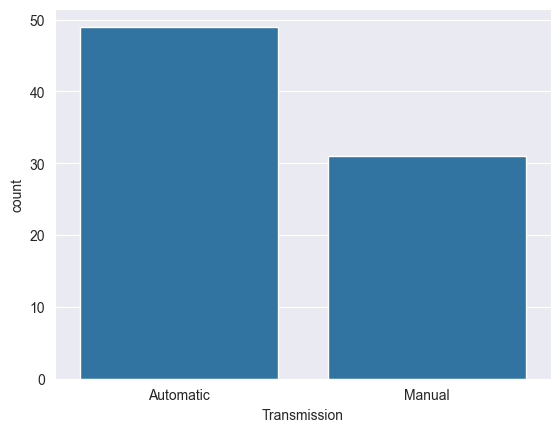

In [424]:
sns.countplot(data=X_train, x='Transmission');

In [425]:
transmission_codes = {'Automatic' : 1, 'Manual' : 0}
X_train['Transmission_Code'] = X_train['Transmission'].map(transmission_codes)
X_test['Transmission_Code'] = X_test['Transmission'].map(transmission_codes)

In [426]:
enc = preprocessing.OneHotEncoder()
enc.fit(X_train[['Brand']])
enc.categories_

[array(['Audi', 'BMW', 'Ford', 'Honda', 'Hyundai', 'Mahindra', 'Maruti',
        'Mercedes', 'Tata', 'Toyota', 'Volkswagen'], dtype=object)]

In [427]:
X_train_encoded = enc.transform(X_train[['Brand']]).toarray()
X_test_encoded = enc.transform(X_test[['Brand']]).toarray()

In [428]:
# Отримуємо назви колонок після One-Hot Encoding
brand_columns = enc.get_feature_names_out(['Brand'])

# Створюємо DataFrame для One-Hot закодованих значень
X_train_encoded_df = pd.DataFrame(X_train_encoded, columns=brand_columns, index=X_train.index)
X_test_encoded_df = pd.DataFrame(X_test_encoded, columns=brand_columns, index=X_test.index)

# Додаємо закодовані дані до X_train і X_test
X_train = pd.concat([X_train, X_train_encoded_df], axis=1)
X_test = pd.concat([X_test, X_test_encoded_df], axis=1)

In [429]:
ord_enc = preprocessing.OrdinalEncoder(categories=[['First', 'Second', 'Third']])
ord_enc.fit(X_train[['Owner_Type']])

X_train['Owner_Type_Codes'] = ord_enc.transform(X_train[['Owner_Type']])
X_test['Owner_Type_Codes'] = ord_enc.transform(X_test[['Owner_Type']])

Очікуваний результат після трансформацій:

In [430]:
pd.set_option('display.max_columns', 100)
display(X_train.head()), display(X_test.head())

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Fuel_Code,Transmission_Code,Brand_Audi,Brand_BMW,Brand_Ford,Brand_Honda,Brand_Hyundai,Brand_Mahindra,Brand_Maruti,Brand_Mercedes,Brand_Tata,Brand_Toyota,Brand_Volkswagen,Owner_Type_Codes
83,84,Volkswagen,T-Roc,2019,22000,Petrol,Automatic,Second,18,1498,148,5,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
55,56,Audi,A5,2018,28000,Diesel,Automatic,First,17,1968,187,5,0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26,27,Audi,A6,2018,28000,Petrol,Automatic,First,15,1984,241,5,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
54,55,Volkswagen,Vento,2017,32000,Petrol,Manual,Second,18,1598,103,5,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
19,20,Mercedes,GLC,2017,26000,Petrol,Automatic,Second,12,1991,241,5,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Fuel_Code,Transmission_Code,Brand_Audi,Brand_BMW,Brand_Ford,Brand_Honda,Brand_Hyundai,Brand_Mahindra,Brand_Maruti,Brand_Mercedes,Brand_Tata,Brand_Toyota,Brand_Volkswagen,Owner_Type_Codes
17,18,Audi,Q3,2016,38000,Petrol,Automatic,Second,15,1395,148,5,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
41,42,Hyundai,Santro,2019,26000,Petrol,Manual,Third,20,1086,68,5,1,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
92,93,Volkswagen,Vento,2017,32000,Petrol,Manual,Second,18,1598,103,5,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
14,15,Maruti,Ertiga,2020,18000,Petrol,Manual,First,19,1462,103,7,1,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
68,69,Ford,Aspire,2019,26000,Petrol,Manual,Third,20,1194,94,5,1,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0


(None, None)

**Завдання 5.** Оберіть лише числові колонки з `X_train` (можна для цього використати `pandas.select_dtypes(...)` або видалити всі НЕчислові дані, вони нам вже не потрібні), обʼєднайте ці дані з `y_train` (зручно з `pandas.concat([df1, df2], axis=1)`), побудуйте для цих даних матрицю кореляції і проаналізуйте її. Напишіть висновок, які колонки корелюють з цільовою змінною на більш ніж 0.5 за модулем (може бути як позитивна, так і негативна кореляція).

In [431]:
# Вибір лише числових колонок із X_train
numeric_X_train = X_train.select_dtypes(include=['number'])

# Об'єднання числових колонок і цільової змінної
train_with_target = pd.concat([numeric_X_train, y_train], axis=1)

# Побудова матриці кореляції
correlation_matrix = train_with_target.corr()

# Виведення матриці кореляції
print(correlation_matrix)

# Кореляція з цільовою змінною (Price)
correlation_with_target = correlation_matrix['Price']

# Вибір колонок із сильною кореляцією
strong_correlation = correlation_with_target[correlation_with_target.abs() > 0.5]

# Виведення результату
print("Сильна кореляція з цільовою змінною (|r| > 0.5):")
print(strong_correlation)

                     Car_ID      Year  Kilometers_Driven   Mileage    Engine  \
Car_ID             1.000000  0.137027          -0.356614  0.100891 -0.089284   
Year               0.137027  1.000000          -0.708525  0.278559 -0.392764   
Kilometers_Driven -0.356614 -0.708525           1.000000 -0.126621  0.101219   
Mileage            0.100891  0.278559          -0.126621  1.000000 -0.710516   
Engine            -0.089284 -0.392764           0.101219 -0.710516  1.000000   
Power             -0.006319 -0.248442          -0.060803 -0.684705  0.801638   
Seats             -0.063793 -0.278755           0.403656 -0.178619  0.167326   
Fuel_Code          0.090537  0.248515          -0.332351 -0.070112 -0.174455   
Transmission_Code -0.084381 -0.200603          -0.066491 -0.399164  0.456296   
Brand_Audi         0.089473 -0.256523           0.095879 -0.152701  0.085153   
Brand_BMW          0.048335  0.202517          -0.247042 -0.134105  0.287119   
Brand_Ford        -0.020240 -0.150454   

**Висновок:**
Звичайно, що треба було очистити дані від Price тут, бо Price корелює з Price як 1 :)
Видно, що коли пробіг автомобіля (`Mileage`) зростає, то ціна на нього знижується. Також колонки `Engine` та `Power` мають високу кореляцію з ціною автомобіля. Це логічно, бо чим більше об'єм двигуна та потужність, тим вища ціна на авто. Звичайно, що як і в житті, то  тип трансмісії автомобіля також трохи впливає, хоча не так сильно у порівнняні із попередніми змінними.
Але є хороше нагадування, що це не є доказом причинно-наслідкових зв'язків, а лише показником, що ці змінні можуть бути корисними для моделі.

**Завдання 6**. Тренуємо лінійну регресію.
0. Видаліть усі НЕчислові колонки з `X_train`, `X_test`, якщо ще цього не зробили.
1. Натренуйте лінійну регресую з `sklearn` на усіх числових даних тренувального набору `X_train`.
2. Зробіть передбачення на  `X_train`, `X_test`. Знайдіть і виведіть root mean squared error відхилення передбачення від справжніх значень цільової змінної.
3. Побудуйте графік розсіювання передбачень проти реальних даних цільової змінної для тренувального і тестувального наборів даних. Що можете сказати про якість моделі?

In [432]:
# Видалення НЕчислових колонок із X_train і X_test
X_train = X_train.select_dtypes(include=['number'])
X_test = X_test.select_dtypes(include=['number'])

In [433]:
# Ініціалізація лінійної регресії
model = LinearRegression()

# Навчання моделі на тренувальних даних
model.fit(X_train, y_train)

# Передбачення на тренувальних і тестових даних
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Обчислення RMSE
rmse_train = np.sqrt(root_mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(root_mean_squared_error(y_test, y_test_pred))

# Виведення результатів
print(f"RMSE на тренувальних даних: {rmse_train}")
print(f"RMSE на тестових даних: {rmse_test}")

RMSE на тренувальних даних: 458.5777777885868
RMSE на тестових даних: 508.11569658919984


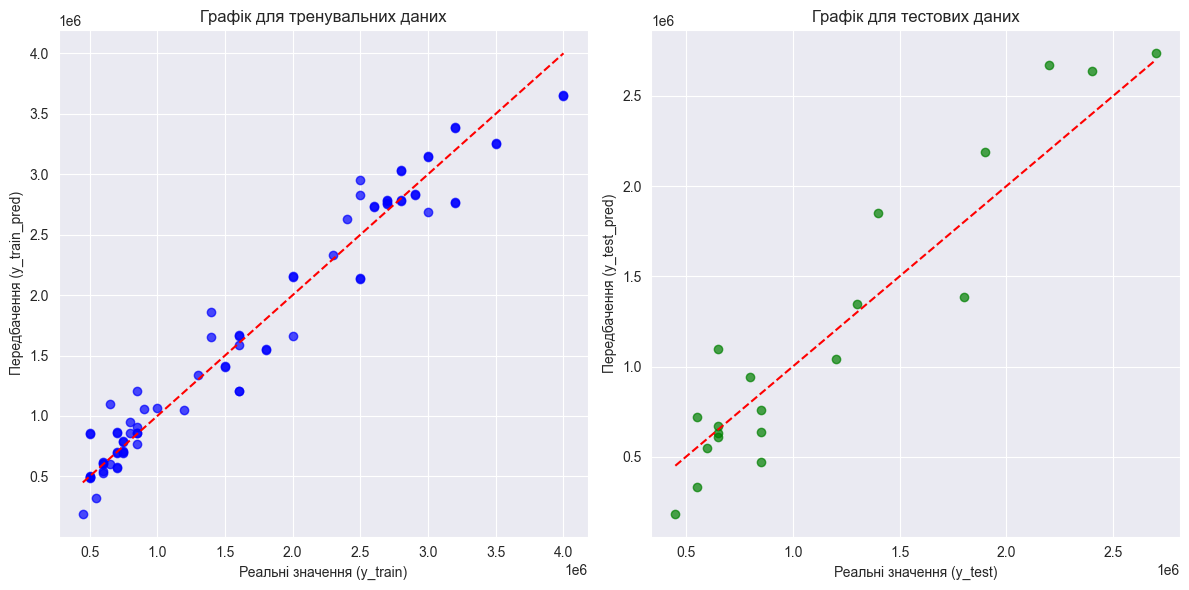

In [434]:
# Графік для тренувальних даних
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(y_train, y_train_pred, alpha=0.7, color='blue')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--')  # Лінія y=x
plt.xlabel('Реальні значення (y_train)')
plt.ylabel('Передбачення (y_train_pred)')
plt.title('Графік для тренувальних даних')

# Графік для тестових даних
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_test_pred, alpha=0.7, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Лінія y=x
plt.xlabel('Реальні значення (y_test)')
plt.ylabel('Передбачення (y_test_pred)')
plt.title('Графік для тестових даних')

plt.tight_layout()
plt.show()

**Висновок:**
Модель непогано показує на тренувальних даних, але дуже погано на тестових, бо точки не лежать на прямій прям. Думаю, якщо би було не 100 записів, а більше, то точки щільніше були б на прямій. Але це лише припущення, можливо, що модель не дуже добре підходить для цих даних. По RMSE видно, що різниця насправді невелика, але графік показує, що є проблеми з точністю передбачень.

**Завдання 7**. Ми хочемо проаналізувати як впливає кожен чинник на цілову змінну. Для цього давайте промасштабуємо наші дані.
1. Зробіть масштабування незалежних змінних використовуючи `StandardScaler`. Тренуємо на тренувальних даних, а на тестувальних лише викликаємо `transform`.

2. Натренуйте модель на відмасштабованих даних і перегляньте коефіцієнти моделі. Які колонки є найвпливовішими на формування передбачення з точки зору коефіцієнтів? Проаналізуйте напрям дії найважливіших коефіцієнтів. Чи це логічно з точки зору значення відповідних змінних, що вони впливають на цільову змінну саме в напрямі збільшення / зменшення?

In [435]:
# Ініціалізація StandardScaler
scaler_enc = preprocessing.StandardScaler()

# Масштабування тренувальних даних
X_train_scaled = scaler_enc.fit_transform(X_train)

# Масштабування тестових даних
X_test_scaled = scaler_enc.transform(X_test)

# Ініціалізація лінійної регресії
model_scaled = LinearRegression()

# Навчання моделі на масштабованих даних
model_scaled.fit(X_train_scaled, y_train)

# Отримання коефіцієнтів моделі
coefficients = model_scaled.coef_

In [436]:
coefficients_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': coefficients,
    'Absolute_Coefficient': abs(coefficients)
})

# Сортуємо за абсолютними значеннями коефіцієнтів
coefficients_df = coefficients_df.sort_values(by='Absolute_Coefficient', ascending=False)

# Виведення таблиці коефіцієнтів
print(coefficients_df)

              Feature    Coefficient  Absolute_Coefficient
5               Power  496769.214899         496769.214899
16     Brand_Mercedes  210048.781148         210048.781148
10          Brand_BMW  208407.313783         208407.313783
9          Brand_Audi  205600.147769         205600.147769
7           Fuel_Code -183848.018909         183848.018909
13      Brand_Hyundai -152304.863911         152304.863911
14     Brand_Mahindra -140945.162904         140945.162904
3             Mileage -131715.512030         131715.512030
11         Brand_Ford -118209.450311         118209.450311
8   Transmission_Code  116693.768206         116693.768206
15       Brand_Maruti -112259.967020         112259.967020
2   Kilometers_Driven  -94398.721486          94398.721486
19   Brand_Volkswagen  -92968.260065          92968.260065
17         Brand_Tata  -65996.246972          65996.246972
12        Brand_Honda  -62753.005386          62753.005386
20   Owner_Type_Codes   42344.952815          42344.9528

**Висновок:**
Дійсно, що `Power` повинен впливати на вартість автомобіля. Чим він більший, тим дорожче машина. Бачимо, що бренд дуже сильно впливає на варість і бачимо, що Mercedes та BMW бренд додає вартості. І це дійсно плата за "бренд". Видно, що `Fuel_Code` впливає із негативним трендом. Тобто дизельні дійсно дешевше. І також чим більший пробіг автомобіля, тим менше його ціна. Це дійсно логічно.
Дивно було бачити, що Ford знижує вартість. Можливо, це через те, що вони випускають більше бюджетні автомобілі, або через щось інше. Але це дійсно цікаво.

**Завдання 8.** На тих самих відмасштабованих даних натренуйте модель з `statsmodels`. Виведіть звіт і проаналізуйте p-value коефіцієнтів. Які ознаки є стат значущими на рівні значущості 0.05? Напишіть їх список.

In [437]:
# Додавання константи до X_train_scaled
X_train_scaled_with_const = sm.add_constant(X_train_scaled)
X_train_scaled_df = pd.DataFrame(X_train_scaled_with_const, columns=['const'] + list(X_train.columns))

# Скидання індексів
y_train = y_train.reset_index(drop=True)

In [438]:
# Тренування моделі з statsmodels
model_sm = sm.OLS(y_train, X_train_scaled_df)
results = model_sm.fit()

# Виведення звіту моделі
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     68.35
Date:                Sun, 12 Jan 2025   Prob (F-statistic):           2.01e-33
Time:                        20:42:23   Log-Likelihood:                -1094.0
No. Observations:                  80   AIC:                             2230.
Df Residuals:                      59   BIC:                             2280.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               1.68e+06   2.74e+0

In [439]:
p_values = results.pvalues
significant_features = p_values[p_values < 0.05]
significant_features_names = significant_features.index.tolist()

print("Статистично значущі ознаки на рівні значущості 0.05:")
print(significant_features)

Статистично значущі ознаки на рівні значущості 0.05:
const                3.734558e-55
Mileage              2.760048e-02
Power                1.343837e-08
Fuel_Code            1.639420e-04
Transmission_Code    1.022962e-02
Brand_Audi           7.485851e-09
Brand_BMW            1.669757e-08
Brand_Ford           8.736558e-04
Brand_Hyundai        2.204650e-06
Brand_Mahindra       1.354686e-05
Brand_Maruti         2.875539e-04
Brand_Mercedes       9.320195e-09
Brand_Volkswagen     2.993263e-03
dtype: float64


**Висновок:**
R-squared на рівні 0.959 показує, що у нас дуже хороша модель і ми все зробили правильно. На основі статистично значущих ознак ми дійсно підтверджуємоо, що `Mileage` `Power`, `Fuel_Code`, `Transmission_Code` та `Brand` (а ми бренд закодили в різні підколонки і видимо, що кожна впливає, то ж я можу сказати, що дані від клієнта у вигляді колонки `Brand` було доцільним) є статистично значущими ознаками.
Це підтверджую нашу здогадку, що більш преміальні автомобілі з більш потужним двигуном, меншим пробігом та дизельним паливом коштують дорожче. А більш бюджетні автомобілі з більшим пробігом повинні коштувати менше.

**Завдання 9**. Натренуйте лінійну регресію з `statsmodels` тільки на ознаках, які виявлись стат. значущими в попередньому завданні. Проаналізуйте показники моделі. Чи значно змінились R2 і Adj. R-squared?

In [440]:
# Перевірка існування колонок
existing_columns = X_train_scaled_df.columns.tolist()

# Фільтрація значущих ознак на основі наявності в DataFrame
available_significant_features = [feature for feature in significant_features_names if feature in existing_columns]

# Вибір значущих існуючих ознак
X_train_significant = X_train_scaled_df[available_significant_features]

In [441]:
# Тренування моделі з statsmodels
model_sm_significant_soft = sm.OLS(y_train, X_train_significant).fit()

# Виведення звіту моделі
summary = model_sm_significant_soft.summary()
print(summary)

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                     109.4
Date:                Sun, 12 Jan 2025   Prob (F-statistic):           4.12e-39
Time:                        20:42:23   Log-Likelihood:                -1100.4
No. Observations:                  80   AIC:                             2227.
Df Residuals:                      67   BIC:                             2258.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               1.68e+06   2.78e+0

**Висновок:**
R-squared: 0.951 та Adj. R-squared: 0.943 стали. А були - R-squared: 0.959 та Adj. R-squared: 0.945. Бачимо, що модель трохи погіршилась. в такому випадку. Воно не значно змінилось і все допустимо. Тобто ми можемо сказати, що ці всі параметри дійсно впливають на ціну автомобіля.

**Завдання 10**. Натренуйте лінійну регресію з `statsmodels` на усіх ознаках з масштабованого `X_train`, у яких p_value в завданні 7 менше за `0.25`. Ми таким чином помʼякшили критерій відбору ознак. Проаналізуйте показники моделі. Чи значно змінились R2 і Adj. R-squared порівняно з завданням 7? Яку модель з останніх 3х завдань ви б лишили для використання?

In [442]:
p_values = results.pvalues
soft_significant_features = p_values[p_values < 0.25]
soft_significant_features_names = soft_significant_features.index.tolist()

print("Статистично значущі ознаки на рівні значущості 0.25:")
print(significant_features)

Статистично значущі ознаки на рівні значущості 0.25:
const                3.734558e-55
Mileage              2.760048e-02
Power                1.343837e-08
Fuel_Code            1.639420e-04
Transmission_Code    1.022962e-02
Brand_Audi           7.485851e-09
Brand_BMW            1.669757e-08
Brand_Ford           8.736558e-04
Brand_Hyundai        2.204650e-06
Brand_Mahindra       1.354686e-05
Brand_Maruti         2.875539e-04
Brand_Mercedes       9.320195e-09
Brand_Volkswagen     2.993263e-03
dtype: float64


In [443]:
# Перевірка існування колонок
existing_columns = X_train_scaled_df.columns.tolist()

# Фільтрація значущих ознак на основі наявності в DataFrame
available_soft_significant_features = [feature for feature in soft_significant_features_names if feature in existing_columns]

# Вибір значущих існуючих ознак
X_train_soft_significant = X_train_scaled_df[available_soft_significant_features]

In [444]:
# Тренування моделі з statsmodels
model_sm_soft_significant_soft = sm.OLS(y_train, X_train_soft_significant).fit()

# Виведення звіту моделі
summary = model_sm_soft_significant_soft.summary()
print(summary)

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     97.03
Date:                Sun, 12 Jan 2025   Prob (F-statistic):           4.85e-38
Time:                        20:42:23   Log-Likelihood:                -1094.7
No. Observations:                  80   AIC:                             2221.
Df Residuals:                      64   BIC:                             2260.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               1.68e+06   2.65e+0

**Висновок:**
Зараз ми маємо R-squared: 0.958 та Adj. R-squared 0.948. Тобто перша модель була найкрутіша сама добра по R-squared. Ця йде наступною і остання із 9 завданням. Я би взяв першу модель, бо вона найкраща звичайно і вона має найбільшу точність (хоча не прям настільки). Тобто дійсно всі значущі параметри впливають на ціну автомобіля і ми їх знайшли. Можна було б ще спробувати закодувати модель втомобіля щось типу седан, хетчбек і подивитись чи впливає це на ціну автомобіля. Попередньо думаю, що ні, бо ми вже знайшли усі статистично значущі параметри.

Насправді усі моделі дуже близькі і показують хороший результат. Можна для "простити" використати з найбільш значущими фічами, щоб легше було розуміти і аналізувати людині також для подальшого використання. Цікаво було б донавчати її на більших даних і подивитись тоді так, але ми розуміємо, що там тільки точність буде гірше на простеньких моделях, але це не означає, що вона буде гірше, бо навіть 0.85 це буде також хороший результат.

